In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

df = pd.read_csv("spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df_spam=df[df["Category"]=="spam"]
df_spam.shape

(747, 2)

In [6]:
df_ham=df[df["Category"]=="ham"]
df_ham.shape

(4825, 2)

In [7]:
df_ham=df_ham.sample(df_spam.shape[0])

In [8]:
df_ham.shape

(747, 2)

In [9]:
df_balanced=pd.concat([df_ham,df_spam])
df_balanced.shape

(1494, 2)

In [10]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
2295,spam,You have 1 new message. Please call 08718738034.,1
3599,ham,"Aight, we'll head out in a few",0
1719,ham,"As in missionary hook up, doggy hook up, stand...",0
527,spam,Today's Offer! Claim ur £150 worth of discount...,1
1774,ham,"I'm not coming over, do whatever you want",0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [12]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [13]:
inputs=tf.keras.layers.Input(shape=(),dtype=tf.string, name='text')
preprocessed_text=bert_preprocess(inputs)
outputs=bert_encoder(preprocessed_text)
l=tf.keras.layers.Dropout(0.2,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(10,activation='relu')(l)
l=tf.keras.layers.Dense(1,activation='sigmoid')(l)
model = tf.keras.Model(inputs=[inputs], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [14]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [15]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
35/35 [==============================] - 24s 284ms/step - loss: 0.5151 - accuracy: 0.7563 - precision: 0.7420 - recall: 0.7857
Epoch 2/15
35/35 [==============================] - 10s 287ms/step - loss: 0.3651 - accuracy: 0.8598 - precision: 0.8468 - recall: 0.8786
Epoch 3/15
35/35 [==============================] - 10s 289ms/step - loss: 0.2900 - accuracy: 0.8911 - precision: 0.8883 - recall: 0.8946
Epoch 4/15
35/35 [==============================] - 10s 294ms/step - loss: 0.2642 - accuracy: 0.9018 - precision: 0.8961 - recall: 0.9089
Epoch 5/15
35/35 [==============================] - 10s 287ms/step - loss: 0.2415 - accuracy: 0.9205 - precision: 0.9153 - recall: 0.9268
Epoch 6/15
35/35 [==============================] - 10s 285ms/step - loss: 0.2255 - accuracy: 0.9241 - precision: 0.9234 - recall: 0.9250
Epoch 7/15
35/35 [==============================] - 10s 289ms/step - loss: 0.2084 - accuracy: 0.9321 - precision: 0.9276 - recall: 0.9375
Epoch 8/15
35/35 [================

In [16]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 266ms/step - loss: 0.1767 - accuracy: 0.9385 - precision: 0.9020 - recall: 0.9840


[0.17668908834457397,
 0.9385026693344116,
 0.9019607901573181,
 0.9839572310447693]

In [17]:
y_predicted = model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 4s 269ms/step


In [18]:
y_predicted

array([0.9985684 , 0.9976083 , 0.97212493, 0.072776  , 0.02063523,
       0.00469569, 0.9920145 , 0.86576104, 0.00634834, 0.9711464 ,
       0.7257449 , 0.321752  , 0.99453473, 0.08535752, 0.98310065,
       0.97424525, 0.9913101 , 0.06968976, 0.94986176, 0.04528719,
       0.42801598, 0.9891642 , 0.98354304, 0.04185627, 0.96899295,
       0.02576111, 0.9690597 , 0.01149353, 0.02919071, 0.01715755,
       0.00569441, 0.40740243, 0.01130754, 0.4905461 , 0.9984956 ,
       0.98959327, 0.01769374, 0.99564385, 0.8917455 , 0.16775471,
       0.00307934, 0.99480224, 0.03367708, 0.99739134, 0.09887516,
       0.43782496, 0.9984627 , 0.9967141 , 0.43586904, 0.0920416 ,
       0.01041265, 0.99448204, 0.01242864, 0.9927825 , 0.9964031 ,
       0.9896367 , 0.9864618 , 0.94388115, 0.98530364, 0.03182113,
       0.00437213, 0.9805313 , 0.04565312, 0.9971275 , 0.999728  ,
       0.01282858, 0.85036653, 0.38318   , 0.17635004, 0.00666687,
       0.01768192, 0.9115618 , 0.8297041 , 0.9828351 , 0.97386

In [19]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

Text(50.722222222222214, 0.5, 'Truth')

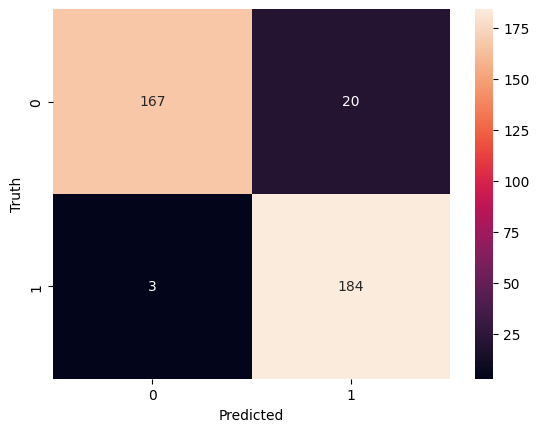

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94       187
           1       0.90      0.98      0.94       187

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



In [22]:
model.save('email_model.h5')

In [23]:
df_spam.head(30)

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [24]:
df_ham.head()

,Category,Message
3065,ham,Ok. How many should i buy.
4113,ham,"I'll see, but prolly yeah"
5480,ham,Have you seen who's back at Holby?!
3692,ham,"Sir, i am waiting for your call, once free ple..."
3243,ham,Good Morning my Dear........... Have a great &...
